In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import logging

FORMAT = '%(asctime)s %(message)s'
logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')

sns.set_context("talk")

In [3]:
from src.parameters import ANIMALS
from loren_frank_data_processing import make_epochs_dataframe


epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info = epoch_info.loc[(epoch_info.type == 'run') &
                            (epoch_info.environment == 'wtrack')]
epoch_info

environment type  exposure
animal day epoch                           
Jaq    3   2          wtrack  run       1.0
           4          wtrack  run       2.0
           6          wtrack  run       3.0
           8          wtrack  run       4.0
           10         wtrack  run       5.0
...                      ...  ...       ...
Roqui  5   6          wtrack  run      25.0
           8          wtrack  run      26.0
       6   2          wtrack  run      27.0
           4          wtrack  run      28.0
           6          wtrack  run      29.0

[89 rows x 3 columns]

In [4]:
import os
from src.load_data import load_data
import xarray as xr
from src.parameters import PROCESSED_DATA_DIR
from src.analysis import get_replay_info


def analyze_data(epoch_key):
    epoch_identifier = f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}"
    results_filename = os.path.join(
        PROCESSED_DATA_DIR,
        f"{epoch_identifier}_clusterless_forward_reverse_results.nc"
    )
    results = xr.open_dataset(results_filename)
    data = load_data(epoch_key,
                     position_to_linearize=['nose_x', 'nose_y'],
                     max_distance_from_well=30,
                     min_distance_traveled=50,
                     )
    return get_replay_info(data, results, epoch_key)



In [80]:
from tqdm.autonotebook import tqdm

replay_info = []
classified_states = []
for epoch_key in tqdm(epoch_info.index):
    print(epoch_key)
    try:
        ri, cs = analyze_data(epoch_key)
        replay_info.append(ri)
        classified_states.append(cs)
    except (FileNotFoundError, KeyError, TypeError, AttributeError) as e:
        print(e)

  0%|          | 0/89 [00:00<?, ?it/s]

10-Nov-21 14:56:58 Loading position info...


('Jaq', 3, 2)


10-Nov-21 14:57:39 Loading multiunit...
10-Nov-21 14:57:54 Loading spikes...
10-Nov-21 14:58:47 Finding ripple times...


('Jaq', 3, 4)


10-Nov-21 14:59:20 Loading position info...
10-Nov-21 15:00:02 Loading multiunit...
10-Nov-21 15:00:17 Loading spikes...
10-Nov-21 15:01:09 Finding ripple times...


('Jaq', 3, 6)


10-Nov-21 15:01:56 Loading position info...
10-Nov-21 15:02:38 Loading multiunit...
10-Nov-21 15:02:53 Loading spikes...
10-Nov-21 15:03:48 Finding ripple times...
10-Nov-21 15:04:35 Loading position info...


('Jaq', 3, 8)


10-Nov-21 15:05:17 Loading multiunit...
10-Nov-21 15:05:32 Loading spikes...
10-Nov-21 15:06:28 Finding ripple times...
10-Nov-21 15:07:17 Loading position info...


('Jaq', 3, 10)


10-Nov-21 15:07:59 Loading multiunit...
10-Nov-21 15:08:14 Loading spikes...
10-Nov-21 15:09:03 Finding ripple times...


('Jaq', 3, 12)


10-Nov-21 15:09:49 Loading position info...
10-Nov-21 15:10:31 Loading multiunit...
10-Nov-21 15:10:46 Loading spikes...
10-Nov-21 15:11:38 Finding ripple times...


('Jaq', 3, 14)


10-Nov-21 15:12:25 Loading position info...
10-Nov-21 15:13:08 Loading multiunit...
10-Nov-21 15:13:23 Loading spikes...
10-Nov-21 15:14:07 Finding ripple times...


('Jaq', 3, 16)


10-Nov-21 15:14:54 Loading position info...
10-Nov-21 15:15:36 Loading multiunit...
10-Nov-21 15:15:51 Loading spikes...
10-Nov-21 15:16:36 Finding ripple times...
10-Nov-21 15:17:24 Loading position info...


('Jaq', 4, 2)


10-Nov-21 15:18:06 Loading multiunit...
10-Nov-21 15:18:13 Loading spikes...
10-Nov-21 15:18:34 Finding ripple times...
10-Nov-21 15:19:12 Loading position info...


('Jaq', 4, 4)


10-Nov-21 15:19:54 Loading multiunit...
10-Nov-21 15:20:00 Loading spikes...
10-Nov-21 15:20:21 Finding ripple times...
10-Nov-21 15:20:59 Loading position info...


('Jaq', 4, 6)


10-Nov-21 15:21:41 Loading multiunit...
10-Nov-21 15:21:48 Loading spikes...
10-Nov-21 15:22:08 Finding ripple times...
10-Nov-21 15:22:50 Loading position info...


('Lotus', 3, 2)


10-Nov-21 15:23:30 Loading multiunit...
10-Nov-21 15:23:35 Loading spikes...
10-Nov-21 15:24:10 Finding ripple times...


('Lotus', 3, 4)


10-Nov-21 15:24:42 Loading position info...
10-Nov-21 15:25:23 Loading multiunit...
10-Nov-21 15:25:28 Loading spikes...
10-Nov-21 15:25:54 Finding ripple times...


('Lotus', 3, 6)


10-Nov-21 15:26:25 Loading position info...
10-Nov-21 15:27:07 Loading multiunit...
10-Nov-21 15:27:11 Loading spikes...
10-Nov-21 15:27:37 Finding ripple times...
10-Nov-21 15:28:10 Loading position info...


('Lotus', 3, 8)


10-Nov-21 15:28:52 Loading multiunit...
10-Nov-21 15:28:57 Loading spikes...
10-Nov-21 15:29:24 Finding ripple times...
10-Nov-21 15:29:55 Loading position info...


('Lotus', 3, 10)


10-Nov-21 15:30:38 Loading multiunit...
10-Nov-21 15:30:42 Loading spikes...
10-Nov-21 15:31:09 Finding ripple times...
10-Nov-21 15:31:41 Loading position info...


('Lotus', 3, 12)


10-Nov-21 15:32:23 Loading multiunit...
10-Nov-21 15:32:28 Loading spikes...
10-Nov-21 15:32:55 Finding ripple times...


('Lotus', 3, 14)


10-Nov-21 15:33:26 Loading position info...
10-Nov-21 15:34:09 Loading multiunit...
10-Nov-21 15:34:14 Loading spikes...
10-Nov-21 15:34:42 Finding ripple times...


('Lotus', 3, 16)


10-Nov-21 15:35:11 Loading position info...
10-Nov-21 15:35:54 Loading multiunit...
10-Nov-21 15:35:58 Loading spikes...
10-Nov-21 15:36:24 Finding ripple times...
10-Nov-21 15:36:53 Loading position info...


('Lotus', 3, 18)


10-Nov-21 15:37:36 Loading multiunit...
10-Nov-21 15:37:40 Loading spikes...
10-Nov-21 15:38:05 Finding ripple times...
10-Nov-21 15:38:33 Loading position info...


('Lotus', 4, 2)


10-Nov-21 15:39:15 Loading multiunit...
10-Nov-21 15:39:17 Loading spikes...
10-Nov-21 15:39:35 Finding ripple times...
10-Nov-21 15:40:03 Loading position info...


('Lotus', 4, 4)


10-Nov-21 15:40:44 Loading multiunit...
10-Nov-21 15:40:47 Loading spikes...
10-Nov-21 15:41:05 Finding ripple times...
10-Nov-21 15:41:35 Loading position info...


('Lotus', 4, 6)


10-Nov-21 15:42:17 Loading multiunit...
10-Nov-21 15:42:20 Loading spikes...
10-Nov-21 15:42:37 Finding ripple times...


('Lotus', 5, 2)


10-Nov-21 15:43:08 Loading position info...
10-Nov-21 15:43:49 Loading multiunit...
10-Nov-21 15:43:52 Loading spikes...
10-Nov-21 15:44:10 Finding ripple times...


('Lotus', 5, 4)


10-Nov-21 15:44:38 Loading position info...
10-Nov-21 15:45:19 Loading multiunit...
10-Nov-21 15:45:22 Loading spikes...
10-Nov-21 15:45:42 Finding ripple times...


('Lotus', 5, 6)


10-Nov-21 15:46:11 Loading position info...
10-Nov-21 15:46:53 Loading multiunit...
10-Nov-21 15:46:56 Loading spikes...
10-Nov-21 15:47:17 Finding ripple times...


('Lotus', 5, 8)


10-Nov-21 15:47:45 Loading position info...
10-Nov-21 15:48:26 Loading multiunit...
10-Nov-21 15:48:29 Loading spikes...
10-Nov-21 15:48:52 Finding ripple times...


('Lotus', 6, 2)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Lotus_06_02_clusterless_forward_reverse_results.nc'
('Lotus', 6, 4)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Lotus_06_04_clusterless_forward_reverse_results.nc'
('Lotus', 6, 6)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Lotus_06_06_clusterless_forward_reverse_results.nc'
('Lotus', 6, 8)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Lotus_06_08_clusterless_forward_reverse_results.nc'
('Monty', 3, 2)


10-Nov-21 15:49:19 Loading position info...
10-Nov-21 15:49:59 Loading multiunit...
10-Nov-21 15:50:14 Loading spikes...
10-Nov-21 15:50:18 Finding ripple times...


('Monty', 3, 4)


10-Nov-21 15:50:58 Loading position info...
10-Nov-21 15:51:39 Loading multiunit...
10-Nov-21 15:51:54 Loading spikes...
10-Nov-21 15:51:58 Finding ripple times...
10-Nov-21 15:52:43 Loading position info...


('Monty', 3, 6)


10-Nov-21 15:53:23 Loading multiunit...
10-Nov-21 15:53:38 Loading spikes...
10-Nov-21 15:53:41 Finding ripple times...


('Monty', 3, 8)


10-Nov-21 15:54:24 Loading position info...
10-Nov-21 15:55:04 Loading multiunit...
10-Nov-21 15:55:19 Loading spikes...
10-Nov-21 15:55:22 Finding ripple times...


('Monty', 3, 10)


10-Nov-21 15:56:07 Loading position info...
10-Nov-21 15:56:47 Loading multiunit...
10-Nov-21 15:57:02 Loading spikes...
10-Nov-21 15:57:06 Finding ripple times...


('Monty', 3, 12)


10-Nov-21 15:57:45 Loading position info...
10-Nov-21 15:58:25 Loading multiunit...
10-Nov-21 15:58:40 Loading spikes...
10-Nov-21 15:58:43 Finding ripple times...


('Monty', 3, 14)


10-Nov-21 15:59:23 Loading position info...
10-Nov-21 16:00:03 Loading multiunit...
10-Nov-21 16:00:18 Loading spikes...
10-Nov-21 16:00:21 Finding ripple times...


('Monty', 3, 16)


10-Nov-21 16:01:06 Loading position info...
10-Nov-21 16:01:46 Loading multiunit...
10-Nov-21 16:02:01 Loading spikes...
10-Nov-21 16:02:04 Finding ripple times...


('Monty', 3, 18)


10-Nov-21 16:02:39 Loading position info...
10-Nov-21 16:03:20 Loading multiunit...
10-Nov-21 16:03:35 Loading spikes...
10-Nov-21 16:03:39 Finding ripple times...


('Monty', 4, 2)


10-Nov-21 16:04:21 Loading position info...
10-Nov-21 16:05:01 Loading multiunit...
10-Nov-21 16:05:10 Loading spikes...
10-Nov-21 16:05:14 Finding ripple times...
10-Nov-21 16:05:52 Loading position info...


('Monty', 4, 4)


10-Nov-21 16:06:32 Loading multiunit...
10-Nov-21 16:06:41 Loading spikes...
10-Nov-21 16:06:44 Finding ripple times...


('Monty', 4, 6)


10-Nov-21 16:07:22 Loading position info...
10-Nov-21 16:08:03 Loading multiunit...
10-Nov-21 16:08:11 Loading spikes...
10-Nov-21 16:08:15 Finding ripple times...
10-Nov-21 16:08:54 Loading position info...


('Monty', 4, 8)


10-Nov-21 16:09:35 Loading multiunit...
10-Nov-21 16:09:43 Loading spikes...
10-Nov-21 16:09:47 Finding ripple times...
10-Nov-21 16:10:26 Loading position info...


('Monty', 4, 10)


10-Nov-21 16:11:06 Loading multiunit...
10-Nov-21 16:11:15 Loading spikes...
10-Nov-21 16:11:18 Finding ripple times...


('Monty', 5, 2)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Monty_05_02_clusterless_forward_reverse_results.nc'
('Monty', 5, 4)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Monty_05_04_clusterless_forward_reverse_results.nc'
('Monty', 5, 6)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Monty_05_06_clusterless_forward_reverse_results.nc'
('Monty', 5, 8)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Monty_05_08_clusterless_forward_reverse_results.nc'
('Monty', 8, 2)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Monty_08_02_clusterless_forward_reverse_results.nc'
('Monty', 8, 8)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/Monty_08_08_clusterless_forward_reverse_results.nc'
('Monty', 8, 12)
[Errno 2] No such file or directory: b'/stelmo/edeno/pose_analysis/Processed-Data/M

10-Nov-21 16:11:52 Loading position info...
10-Nov-21 16:12:31 Loading multiunit...
10-Nov-21 16:12:37 Loading spikes...
10-Nov-21 16:12:40 Finding ripple times...


('Peanut', 1, 4)


10-Nov-21 16:13:18 Loading position info...
10-Nov-21 16:13:57 Loading multiunit...
10-Nov-21 16:14:03 Loading spikes...
10-Nov-21 16:14:07 Finding ripple times...
10-Nov-21 16:14:51 Loading position info...


('Peanut', 1, 6)


10-Nov-21 16:15:31 Loading multiunit...
10-Nov-21 16:15:37 Loading spikes...
10-Nov-21 16:15:40 Finding ripple times...


('Peanut', 1, 8)


10-Nov-21 16:16:19 Loading position info...
10-Nov-21 16:16:59 Loading multiunit...
10-Nov-21 16:17:05 Loading spikes...
10-Nov-21 16:17:08 Finding ripple times...
10-Nov-21 16:17:45 Loading position info...


('Peanut', 2, 2)


10-Nov-21 16:18:25 Loading multiunit...
10-Nov-21 16:18:32 Loading spikes...
10-Nov-21 16:18:35 Finding ripple times...
10-Nov-21 16:19:14 Loading position info...


('Peanut', 2, 4)


10-Nov-21 16:19:54 Loading multiunit...
10-Nov-21 16:20:01 Loading spikes...
10-Nov-21 16:20:04 Finding ripple times...
10-Nov-21 16:20:45 Loading position info...


('Peanut', 2, 6)


10-Nov-21 16:21:25 Loading multiunit...
10-Nov-21 16:21:31 Loading spikes...
10-Nov-21 16:21:34 Finding ripple times...
10-Nov-21 16:22:18 Loading position info...


('Peanut', 2, 8)


10-Nov-21 16:23:00 Loading multiunit...
10-Nov-21 16:23:07 Loading spikes...
10-Nov-21 16:23:11 Finding ripple times...


('Roqui', 3, 2)


10-Nov-21 16:23:53 Loading position info...
10-Nov-21 16:24:33 Loading multiunit...
10-Nov-21 16:24:52 Loading spikes...
10-Nov-21 16:27:13 Finding ripple times...
10-Nov-21 16:27:47 Loading position info...


('Roqui', 3, 2)


10-Nov-21 16:28:28 Loading multiunit...
10-Nov-21 16:28:47 Loading spikes...
10-Nov-21 16:31:08 Finding ripple times...


('Roqui', 3, 4)


10-Nov-21 16:31:40 Loading position info...
10-Nov-21 16:32:20 Loading multiunit...
10-Nov-21 16:32:39 Loading spikes...
10-Nov-21 16:34:44 Finding ripple times...
10-Nov-21 16:35:20 Loading position info...


('Roqui', 3, 4)


10-Nov-21 16:36:00 Loading multiunit...
10-Nov-21 16:36:19 Loading spikes...
10-Nov-21 16:38:24 Finding ripple times...


('Roqui', 3, 6)


10-Nov-21 16:38:56 Loading position info...
10-Nov-21 16:39:37 Loading multiunit...
10-Nov-21 16:39:56 Loading spikes...
10-Nov-21 16:42:03 Finding ripple times...
10-Nov-21 16:42:42 Loading position info...


('Roqui', 3, 6)


10-Nov-21 16:43:22 Loading multiunit...
10-Nov-21 16:43:42 Loading spikes...
10-Nov-21 16:45:48 Finding ripple times...


('Roqui', 3, 8)


10-Nov-21 16:46:22 Loading position info...
10-Nov-21 16:47:00 Loading multiunit...
10-Nov-21 16:47:19 Loading spikes...
10-Nov-21 16:49:23 Finding ripple times...
10-Nov-21 16:49:50 Loading position info...


('Roqui', 3, 8)


10-Nov-21 16:50:28 Loading multiunit...
10-Nov-21 16:50:47 Loading spikes...
10-Nov-21 16:52:51 Finding ripple times...
10-Nov-21 16:53:14 Loading position info...


('Roqui', 3, 10)


10-Nov-21 16:53:57 Loading multiunit...
10-Nov-21 16:54:17 Loading spikes...
10-Nov-21 16:56:22 Finding ripple times...
10-Nov-21 16:57:06 Loading position info...


('Roqui', 3, 10)


10-Nov-21 16:57:48 Loading multiunit...
10-Nov-21 16:58:09 Loading spikes...
10-Nov-21 17:00:14 Finding ripple times...
10-Nov-21 17:00:56 Loading position info...


('Roqui', 3, 12)


10-Nov-21 17:01:36 Loading multiunit...
10-Nov-21 17:01:55 Loading spikes...
10-Nov-21 17:04:01 Finding ripple times...
10-Nov-21 17:04:36 Loading position info...


('Roqui', 3, 12)


10-Nov-21 17:05:17 Loading multiunit...
10-Nov-21 17:05:36 Loading spikes...
10-Nov-21 17:07:42 Finding ripple times...


('Roqui', 3, 14)


10-Nov-21 17:08:14 Loading position info...
10-Nov-21 17:08:54 Loading multiunit...
10-Nov-21 17:09:13 Loading spikes...
10-Nov-21 17:11:05 Finding ripple times...
10-Nov-21 17:11:41 Loading position info...


('Roqui', 3, 14)


10-Nov-21 17:12:21 Loading multiunit...
10-Nov-21 17:12:41 Loading spikes...
10-Nov-21 17:14:32 Finding ripple times...


('Roqui', 3, 16)


10-Nov-21 17:15:04 Loading position info...
10-Nov-21 17:15:45 Loading multiunit...
10-Nov-21 17:16:05 Loading spikes...
10-Nov-21 17:18:18 Finding ripple times...
10-Nov-21 17:19:01 Loading position info...


('Roqui', 3, 16)


10-Nov-21 17:19:42 Loading multiunit...
10-Nov-21 17:20:02 Loading spikes...
10-Nov-21 17:22:15 Finding ripple times...


('Roqui', 3, 18)


10-Nov-21 17:22:54 Loading position info...
10-Nov-21 17:23:35 Loading multiunit...
10-Nov-21 17:23:54 Loading spikes...
10-Nov-21 17:25:55 Finding ripple times...
10-Nov-21 17:26:34 Loading position info...


('Roqui', 3, 18)


10-Nov-21 17:27:14 Loading multiunit...
10-Nov-21 17:27:34 Loading spikes...
10-Nov-21 17:29:35 Finding ripple times...


('Roqui', 4, 2)


10-Nov-21 17:30:09 Loading position info...
10-Nov-21 17:30:49 Loading multiunit...
10-Nov-21 17:30:58 Loading spikes...
10-Nov-21 17:31:44 Finding ripple times...
10-Nov-21 17:32:17 Loading position info...


('Roqui', 4, 4)


10-Nov-21 17:32:55 Loading multiunit...
10-Nov-21 17:33:02 Loading spikes...
10-Nov-21 17:33:43 Finding ripple times...


('Roqui', 4, 6)


10-Nov-21 17:34:03 Loading position info...
10-Nov-21 17:34:43 Loading multiunit...
10-Nov-21 17:34:51 Loading spikes...
10-Nov-21 17:35:38 Finding ripple times...
10-Nov-21 17:36:10 Loading position info...


('Roqui', 4, 8)


10-Nov-21 17:36:50 Loading multiunit...
10-Nov-21 17:36:59 Loading spikes...
10-Nov-21 17:37:43 Finding ripple times...


('Roqui', 5, 2)


10-Nov-21 17:38:18 Loading position info...
10-Nov-21 17:38:59 Loading multiunit...
10-Nov-21 17:39:09 Loading spikes...
10-Nov-21 17:40:18 Finding ripple times...


('Roqui', 5, 4)


10-Nov-21 17:40:56 Loading position info...
10-Nov-21 17:41:37 Loading multiunit...
10-Nov-21 17:41:46 Loading spikes...
10-Nov-21 17:42:50 Finding ripple times...
10-Nov-21 17:43:25 Loading position info...


('Roqui', 5, 6)


10-Nov-21 17:44:06 Loading multiunit...
10-Nov-21 17:44:15 Loading spikes...
10-Nov-21 17:45:17 Finding ripple times...
10-Nov-21 17:45:53 Loading position info...


('Roqui', 5, 8)


10-Nov-21 17:46:35 Loading multiunit...
10-Nov-21 17:46:44 Loading spikes...
10-Nov-21 17:47:50 Finding ripple times...
10-Nov-21 17:48:32 Loading position info...


('Roqui', 6, 2)


10-Nov-21 17:49:13 Loading multiunit...
10-Nov-21 17:49:20 Loading spikes...
10-Nov-21 17:50:10 Finding ripple times...
10-Nov-21 17:50:48 Loading position info...


('Roqui', 6, 4)


10-Nov-21 17:51:28 Loading multiunit...
10-Nov-21 17:51:36 Loading spikes...
10-Nov-21 17:52:25 Finding ripple times...
10-Nov-21 17:53:04 Loading position info...


('Roqui', 6, 6)


10-Nov-21 17:53:45 Loading multiunit...
10-Nov-21 17:53:52 Loading spikes...
10-Nov-21 17:54:40 Finding ripple times...


In [83]:
import pandas as pd

replay_info = pd.concat(replay_info)

In [84]:
replay_info.to_csv('forward_reverse_replay_info.csv')

In [85]:
np.save('forward_reverse_classified_states', classified_states)

In [86]:
replay_info

Inbound-Forward  Inbound-Reverse  \
Animal Day Epoch replay_number                                     
Jaq    3   2     1                        False             True   
                 2                        False             True   
                 3                        False             True   
                 4                        False            False   
                 5                        False            False   
...                                         ...              ...   
Roqui  6   6     97                       False            False   
                 98                       False            False   
                 99                       False            False   
                 100                      False            False   
                 101                      False            False   

                                Outbound-Forward  Outbound-Reverse  \
Animal Day Epoch replay_number                                       
Jaq    3   2     1                         False             False   
                 2                         False             False   
                 3                         False             False   
                 4                         False             False   
                 5                          True              True   
...                                          ...               ...   
Roqui  6   6     97                        False             False   
                 98                        False             False   
                 99                        False             False   
                 100                       False             False   
                 101                       False             False   

                                Fragmented  Inbound-Forward_duration  \
Animal Day Epoch replay_number                                         
Jaq    3   2     1                    True                       0.0   
                 2                   False                       0.0   
                 3                   False                       0.0   
                 4                    True                       0.0   
                 5                   False                       0.0   
...                                    ...                       ...   
Roqui  6   6     97                  False                       0.0   
                 98                  False                       0.0   
                 99                  False                       0.0   
                 100                 False                       0.0   
                 101                 False                       0.0   

                                Inbound-Reverse_duration  \
Animal Day Epoch replay_number                             
Jaq    3   2     1                                 0.030   
                 2                                 0.004   
                 3                                 0.058   
                 4                                 0.000   
                 5                                 0.000   
...                                                  ...   
Roqui  6   6     97                                0.000   
                 98                                0.000   
                 99                                0.000   
                 100                               0.000   
                 101                               0.000   

                                Outbound-Forward_duration  \
Animal Day Epoch replay_number                              
Jaq    3   2     1                                  0.000   
                 2                                  0.000   
                 3                                  0.000   
                 4                                  0.000   
                 5                                  0.046   
...                                                   ...   
Roqui  6   6     97           

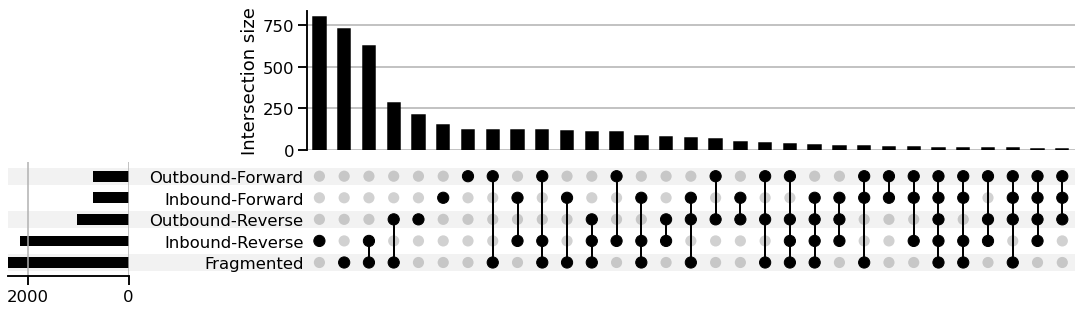

In [87]:
from upsetplot import UpSet
is_classified = np.any(replay_info, axis=1)

UpSet(replay_info.loc[is_classified].reset_index(drop=True).set_index(['Inbound-Forward', 'Inbound-Reverse',
                                                    'Outbound-Forward', 'Outbound-Reverse', 'Fragmented']),
      sort_by='cardinality',
      show_percentages=False,
      totals_plot_elements=5
     )

In [121]:
df = replay_info.loc[is_classified, ['Inbound-Forward', 'Inbound-Reverse', 'Outbound-Forward', 'Outbound-Reverse', 'Fragmented']].reset_index(drop=True)
df['Forward'] = (df['Inbound-Forward'] | df['Outbound-Forward'])
df['Reverse'] = (df['Inbound-Reverse'] | df['Outbound-Reverse'])
df['Inbound'] = (df['Inbound-Forward'] | df['Inbound-Reverse'])
df['Outbound'] = (df['Outbound-Forward'] | df['Outbound-Reverse'])


,Inbound-Forward,Inbound-Reverse,Outbound-Forward,Outbound-Reverse,Fragmented,Forward,Reverse,Inbound,Outbound
0,False,True,False,False,True,False,True,True,False
1,False,True,False,False,False,False,True,True,False
2,False,True,False,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,False
4,False,False,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
4153,False,False,False,True,True,False,True,False,True
4154,False,True,False,False,True,False,True,True,False
4155,True,True,False,False,False,True,True,True,False
4156,False,True,True,False,True,True,True,True,True


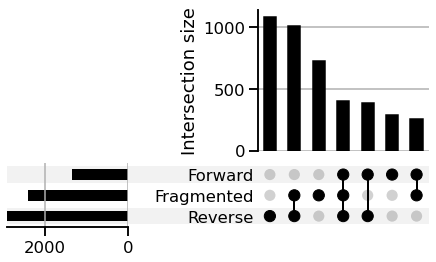

In [123]:
UpSet(df.set_index(['Forward', 'Reverse', 'Fragmented']),
      sort_by='cardinality',
      show_percentages=False,
      totals_plot_elements=5
     )

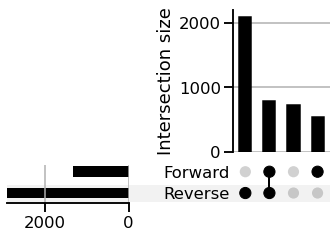

In [125]:
UpSet(df.set_index(['Forward', 'Reverse']),
      sort_by='cardinality',
      show_percentages=False,
      totals_plot_elements=5
     )

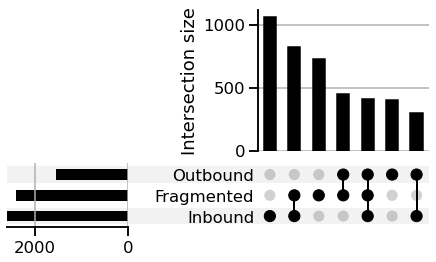

In [124]:
UpSet(df.set_index(['Inbound', 'Outbound', 'Fragmented']),
      sort_by='cardinality',
      show_percentages=False,
      totals_plot_elements=5
     )

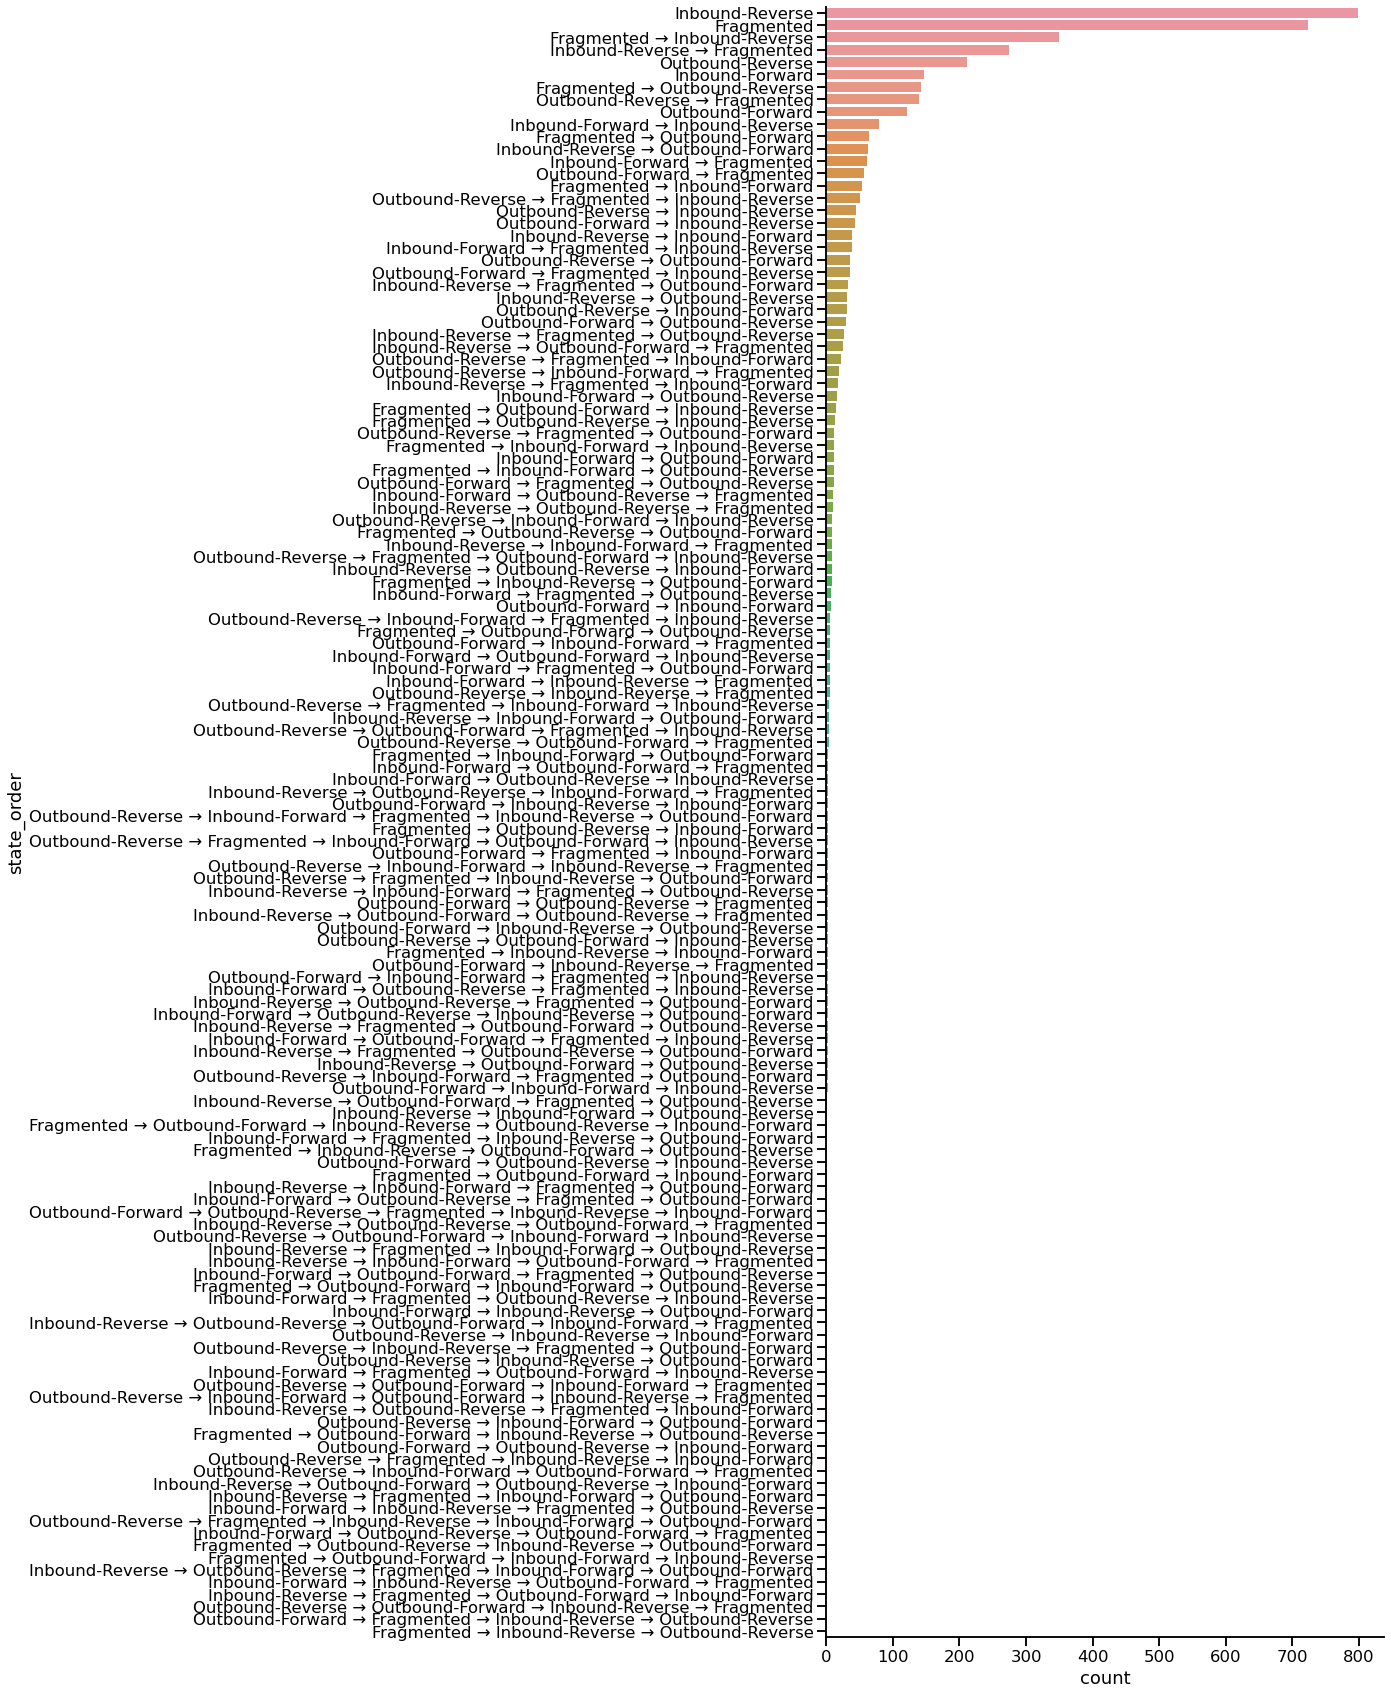

In [88]:
import itertools


fig, ax = plt.subplots(figsize=(10, 30))
state_order = pd.DataFrame([' → '.join(states) for states in list(itertools.chain(*classified_states)) if ~np.all(states == [''])],
                           columns=['state_order'])
sns.countplot(y='state_order',
              data=state_order,
              ax=ax,
              order=state_order['state_order'].value_counts().index)
sns.despine()

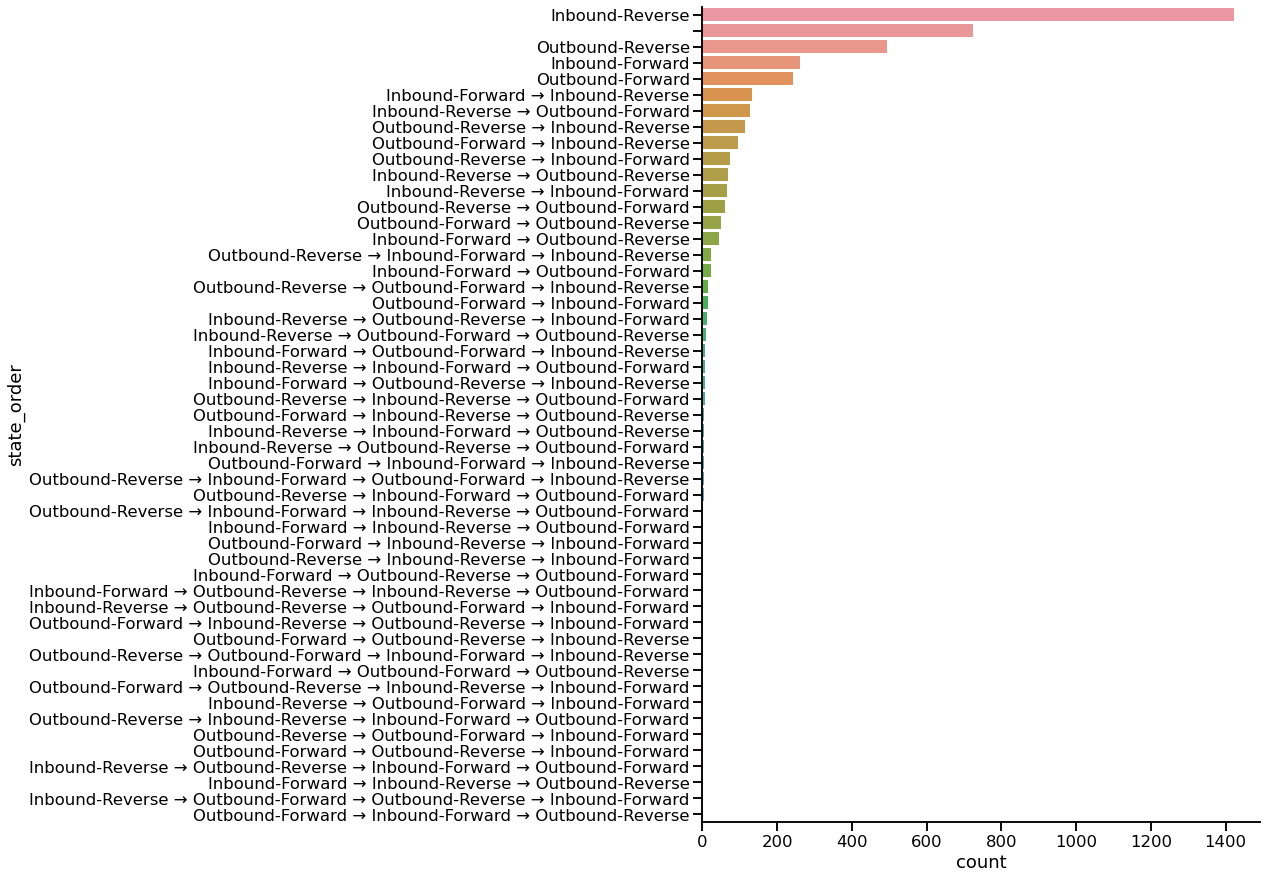

In [136]:
def filter_fragmented(states):
    return [state for state in states if state != 'Fragmented']


fig, ax = plt.subplots(figsize=(10, 15))
state_order = pd.DataFrame([' → '.join(filter_fragmented(states)) for states in list(itertools.chain(*classified_states)) if ~np.all(states == [''])],
                           columns=['state_order'])
sns.countplot(y='state_order',
              data=state_order,
              ax=ax,
              order=state_order['state_order'].value_counts().index)
sns.despine()

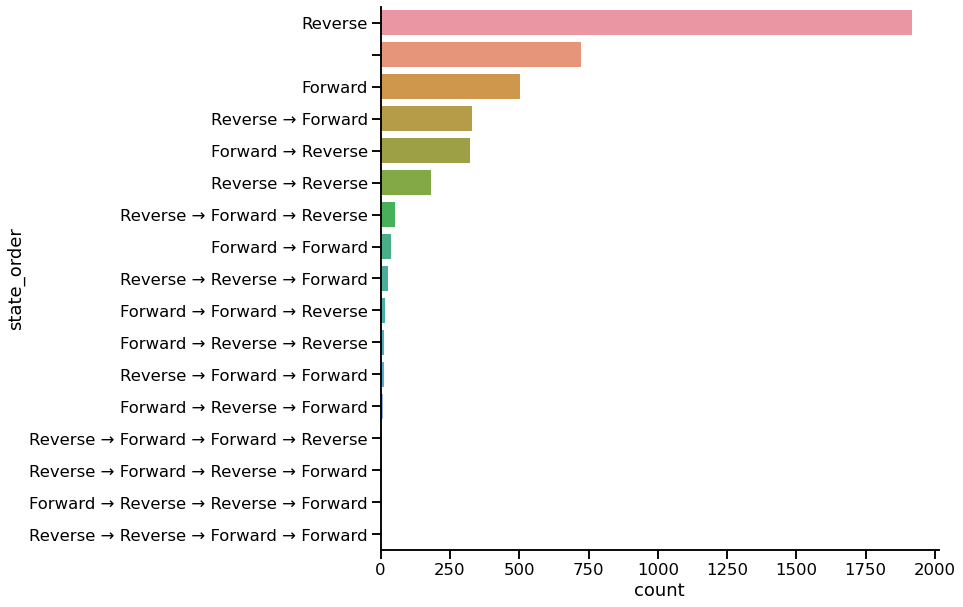

In [135]:
def filter_fragmented(states):
    return [state.replace('Inbound-', '').replace('Outbound-', '') for state in states if state != 'Fragmented']


fig, ax = plt.subplots(figsize=(10, 10))
state_order = pd.DataFrame([' → '.join(filter_fragmented(states)) for states in list(itertools.chain(*classified_states)) if ~np.all(states == [''])],
                           columns=['state_order'])
sns.countplot(y='state_order',
              data=state_order,
              ax=ax,
              order=state_order['state_order'].value_counts().index)
sns.despine()

In [81]:
# replot without fragmented as a possible state
# replot only considering forward and reverse
# paper on how replay sequences are not very theta like?
# where are the switches from forward to reverse?

In [103]:
df = replay_info.filter(like='_duration', axis=1).replace(0.0, np.nan)
df

Inbound-Forward_duration  \
Animal Day Epoch replay_number                             
Jaq    3   2     1                                   NaN   
                 2                                   NaN   
                 3                                   NaN   
                 4                                   NaN   
                 5                                   NaN   
...                                                  ...   
Roqui  6   6     97                                  NaN   
                 98                                  NaN   
                 99                                  NaN   
                 100                                 NaN   
                 101                                 NaN   

                                Inbound-Reverse_duration  \
Animal Day Epoch replay_number                             
Jaq    3   2     1                                 0.030   
                 2                                 0.004   
                 3                                 0.058   
                 4                                   NaN   
                 5                                   NaN   
...                                                  ...   
Roqui  6   6     97                                  NaN   
                 98                                  NaN   
                 99                                  NaN   
                 100                                 NaN   
                 101                                 NaN   

                                Outbound-Forward_duration  \
Animal Day Epoch replay_number                              
Jaq    3   2     1                                    NaN   
                 2                                    NaN   
                 3                                    NaN   
                 4                                    NaN   
                 5                                  0.046   
...                                                   ...   
Roqui  6   6     97                                   NaN   
                 98                                   NaN   
                 99                                   NaN   
                 100                                  NaN   
                 101                                  NaN   

                                Outbound-Reverse_duration  Fragmented_duration  
Animal Day Epoch replay_number                                                  
Jaq    3   2     1                                    NaN                0.030  
                 2                                    NaN                  NaN  
                 3                                    NaN                  NaN  
                 4                                    NaN                0.124  
                 5                                   0.01                  NaN  
...                                                   ...                  ...  
Roqui  6   6     97                                   NaN                  NaN  
                 98                                   NaN                  NaN  
                 99                                   NaN                  NaN  
                 100                                  NaN                  NaN  
                 101                                  NaN                  NaN  

[7806 rows x 5 columns]

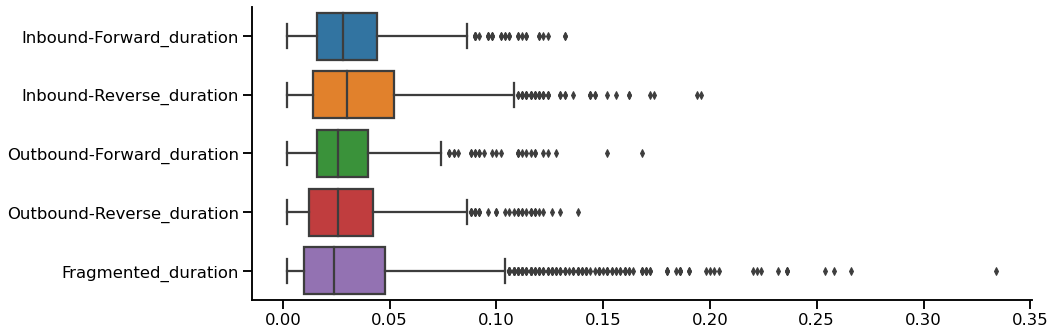

In [113]:
import seaborn as sns

sns.catplot(data=df, orient='horizontal', kind='box', aspect=3)

In [5]:
from replay_trajectory_classification import ClusterlessClassifier

epoch_key = 'Jaq', 3, 14

epoch_identifier = f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}"
results_filename = os.path.join(
    PROCESSED_DATA_DIR,
    f"{epoch_identifier}_clusterless_forward_reverse_results.nc"
)
results = xr.open_dataset(results_filename)
data = load_data(epoch_key,
                 position_to_linearize=['nose_x', 'nose_y'],
                 max_distance_from_well=30,
                 min_distance_traveled=50,
                 )

classifier_filename = os.path.join(
    PROCESSED_DATA_DIR,
    f"{epoch_identifier}_clusterless_forward_reverse_classifier.pkl")
classifier = ClusterlessClassifier.load_model(classifier_filename)

11-Nov-21 11:52:47 Loading position info...
11-Nov-21 11:53:29 Loading multiunit...
11-Nov-21 11:53:45 Loading spikes...
11-Nov-21 11:54:29 Finding ripple times...


In [11]:
replay_number = 1
ripple = data['ripple_times'].loc[replay_number]
result = results.sel(time=slice(ripple.start_time / np.timedelta64(1, 's'), ripple.end_time / np.timedelta64(1, 's')))
result.sum('state')

<xarray.Dataset>
Dimensions:            (time: 48, state: 6, position: 201)
Coordinates:
  * time               (time) float64 1.922e+04 1.922e+04 ... 1.922e+04
  * position           (position) float64 0.9993 2.998 4.997 ... 420.7 422.7
  * state              (state) object 'Inbound-Forward' ... 'Outbound-Fragmen...
Data variables:
    likelihood         (time, state, position) float64 ...
    causal_posterior   (time, state, position) float64 ...
    acausal_posterior  (time, state, position) float64 ...

In [13]:
import copy


def plot_classifier_inbound_outbound_spikes(
    time_slice,
    classifier,
    results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
    legend=True,
):

    t = data["position_info"].index / np.timedelta64(1, "s")
    cmap = copy.copy(plt.get_cmap('bone_r'))
    cmap.set_bad(color="lightgrey", alpha=1.0)

    fig, axes = plt.subplots(
        4,
        1,
        figsize=figsize,
        sharex=True,
        constrained_layout=True,
        gridspec_kw={"height_ratios": [3, 1, 1, 1]},
    )

    # ax 0
    (results[posterior_type]
     .sum('state')
     .where(classifier.is_track_interior_)
     .sel(time=time_slice)
     .plot(
         x="time",
         y="position",
         robust=True,
         ax=axes[0],
         cmap=cmap,
         vmin=0.0,
         add_colorbar=legend,
    ))

    axes[0].set_ylabel("Position [cm]")

    axes[0].scatter(
        data["position_info"].reset_index().set_index(t).loc[time_slice].index,
        data["position_info"]
        .reset_index()
        .set_index(t)
        .loc[time_slice]
        .linear_position,
        color="magenta",
        alpha=0.8,
        s=10,
        zorder=100,
    )
    axes[0].set_xlabel("")

    # ax 1
    fragmented = (results[posterior_type]
                  .sel(state=['Inbound-Fragmented', 'Outbound-Fragmented'])
                  .sum(['state', 'position'])
                  .assign_coords({'state': 'Fragmented'}))
    probability = (results[posterior_type]
                   .sum('position')
                   .drop_sel(state=['Inbound-Fragmented', 'Outbound-Fragmented']))
    probability = xr.concat((probability, fragmented), dim='state')
    h = probability.sel(time=time_slice).plot(
        x="time", hue="state", ax=axes[1], add_legend=False, clip_on=False,
    )
    if legend:
        axes[1].legend(handles=h, labels=probability.state.values.tolist(),
                       bbox_to_anchor=(1.10, 0.8), loc='upper right', ncol=1, fontsize=12)
    axes[1].set_ylabel("Probability")
    axes[1].set_xlabel("")
    axes[1].set_ylim((0, 1))

    # ax 2
    multiunit_firing = (
        data["multiunit_firing_rate"]
        .reset_index(drop=True)
        .set_index(
            data["multiunit_firing_rate"].index / np.timedelta64(1, "s"))
    )

    axes[2].fill_between(
        multiunit_firing.loc[time_slice].index.values,
        multiunit_firing.loc[time_slice].values.squeeze(),
        color="black",
    )
    axes[2].set_ylabel("Firing Rate\n[spikes / s]")

    # ax 3
    axes[3].fill_between(
        data["position_info"].reset_index().set_index(t).loc[time_slice].index,
        np.abs(data["position_info"]
               .reset_index()
               .set_index(t)
               .loc[time_slice]
               .tailBase_vel.values.squeeze()),
        color="lightgrey",
        linewidth=1,
        alpha=0.5,
    )
    axes[3].set_ylabel("Speed \n[cm / s]")
    axes[3].set_xlabel("Time [s]")
    axes[3].ticklabel_format(style='plain', axis='x')
    
    sns.despine()

KeyboardInterrupt: 

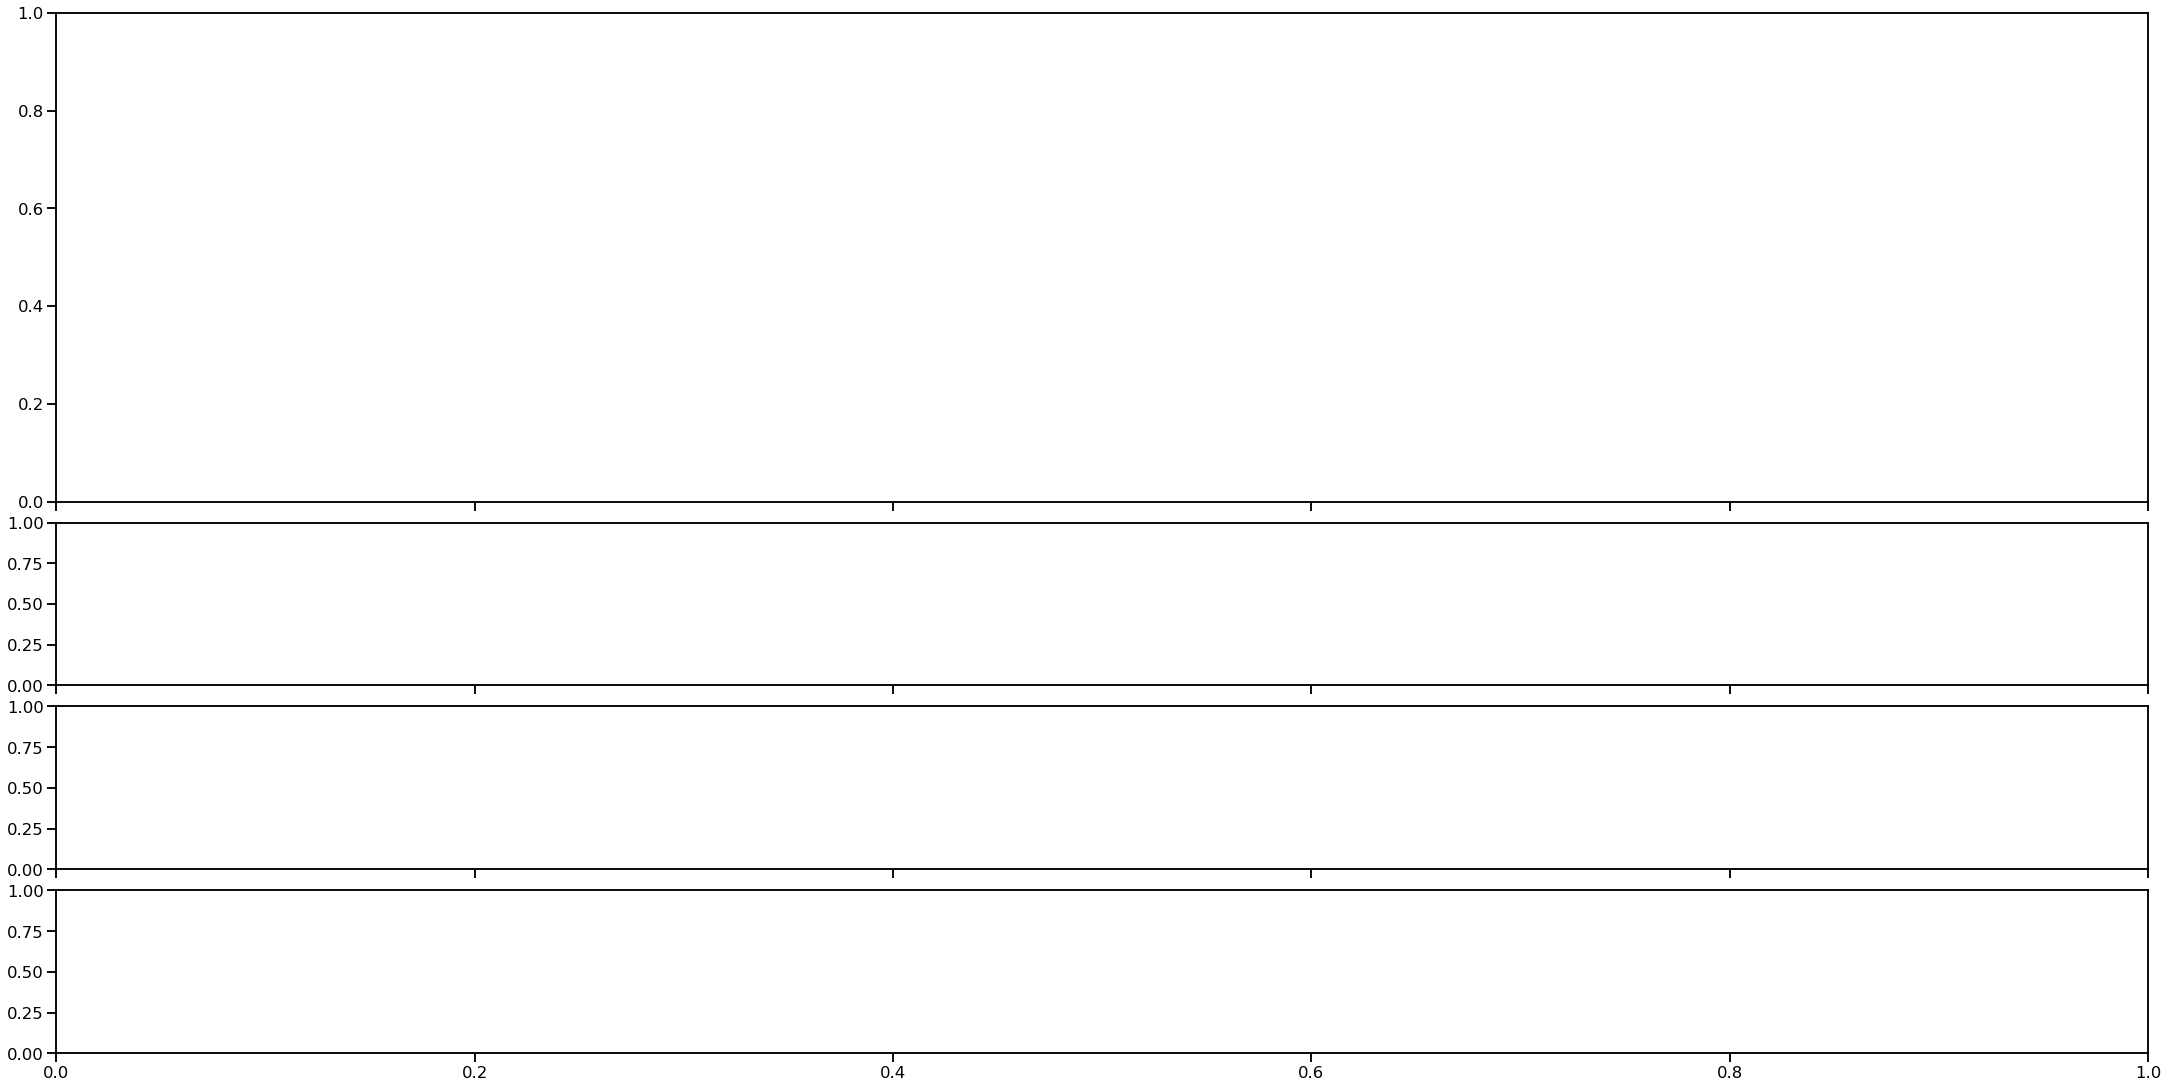

In [14]:
time_slice = slice(ripple.start_time / np.timedelta64(1, 's'), ripple.end_time / np.timedelta64(1, 's'))

plot_classifier_inbound_outbound_spikes(
    time_slice,
    classifier,
    results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
    legend=True,
)